# Load Libraries

In [1]:
import numpy as np # For vector operation
import pandas as pd # For Data manipulation
import matplotlib.pyplot as plt # For plotting

import seaborn as sns #For data visualization
from scipy import stats

# Load Data

In [2]:
dataset=pd.read_csv("load_regression.csv")
dataset.head()

,Input,Output
0,5551.82208,4931.26380
1,4983.17184,4775.53968
2,4888.39680,4713.81120
3,5072.95872,4689.02628
4,5196.25980,4844.75040


# Check For Null Values and Impute

In [3]:
dataset.isnull().any()

Input     False
Output    False
dtype: bool

In [4]:
dataset = dataset.fillna(method='ffill')

# Check for outliers and Normal distribution

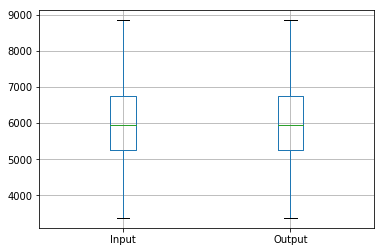

In [5]:
boxplot = dataset.boxplot(column=['Input', 'Output'])

In [6]:
z = np.abs(stats.zscore(dataset))
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


In [7]:
print(np.where(z < -3))

(array([], dtype=int64), array([], dtype=int64))


# Scale Data

In [8]:
input_min=dataset["Input"].min()
output_min=dataset["Output"].min()
input_max=dataset["Input"].max()
output_max=dataset["Output"].max()
print(input_min)
print(output_min)
print(input_max)
print(output_max)

3377.9196
3377.9196
8841.66948
8841.66948


In [9]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
dataset_norm=ms.fit_transform(dataset)
print(dataset_norm)

[[0.39787738 0.28430002]
 [0.29380046 0.25579869]
 [0.27645431 0.24450087]
 ...
 [0.68414596 0.24629825]
 [0.51467861 0.32438447]
 [0.41730621 0.65165045]]


In [10]:
dataset_norm_df=pd.DataFrame(data=dataset_norm[0:,0:]) 
print(dataset_norm_df[1].values)

[0.28430002 0.25579869 0.24450087 ... 0.24629825 0.32438447 0.65165045]


In [11]:
X=dataset_norm_df.iloc[:,0:1].values
Y=dataset_norm_df.iloc[:,1:].values
print(X)

[[0.39787738]
 [0.29380046]
 [0.27645431]
 ...
 [0.68414596]
 [0.51467861]
 [0.41730621]]


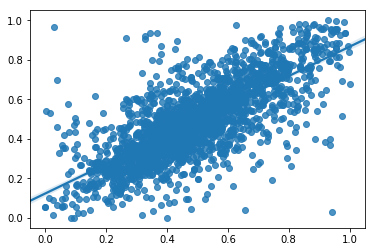

In [13]:
sns.regplot(y=dataset_norm_df[1].values, x=dataset_norm_df[0].values)

# Data Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)

(1728, 1)


# Train Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) # Train the linear regression model
print(X_train.shape)
print(y_train.shape)

(1728, 1)
(1728, 1)


# Test The Regression Model

In [18]:
def inv_trans(load):
    inv_norm_load=load*(output_max-output_min)+output_min
    return inv_norm_load 

In [19]:
y_pred=regressor.predict(X_test) # Test the linear regression model
pred_load=inv_trans(y_pred[2])
act_load=inv_trans(y_test[2])
print(pred_load)
print(act_load)

[6504.62900778]
[6052.8204]


# Regression Model Performance Visualization 

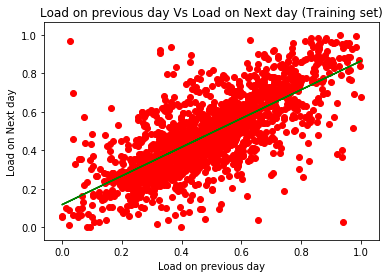

In [20]:
# visualising the training set results
plt.scatter(X_train, y_train,color ='red')
plt.plot(X_train, regressor.predict(X_train),color = 'green')
plt.title('Load on previous day Vs Load on Next day (Training set)')
plt.xlabel('Load on previous day')
plt.ylabel('Load on Next day')
plt.show()

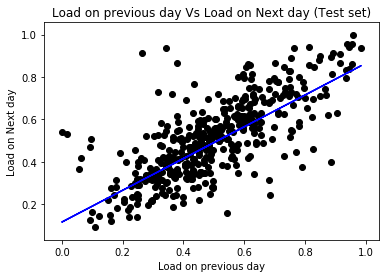

In [22]:
# visualising the test set results
plt.scatter(X_test, y_test,color ='black')
plt.plot(X_test, regressor.predict(X_test),color = 'blue')
plt.title('Load on previous day Vs Load on Next day (Test set)')
plt.xlabel('Load on previous day')
plt.ylabel('Load on Next day')
plt.show()

# Performance Metrices

In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09392963553495831
Mean Squared Error: 0.016317102785734557
Root Mean Squared Error: 0.12773841546588308
